In [5]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import pydotplus as pdot
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.model_selection import train_test_split


In [6]:
data = pd.read_csv("Data_Files/04_03/prediction-py.csv")

In [8]:
# Get colnames for reference
data.columns

Index(['sales', 'sales_classification', 'capita', 'drive-by-traffic',
       'complimentary-establishments', 'competition', 'weather',
       'unemployment-rate', 'var1', 'var2', 'var3'],
      dtype='object')

In [9]:
# Set up test-train 
feature_cols = ['capita', 'competition', 'weather', 'var1', 'var2', 'var3']

train_X, test_X, train_y, test_y = train_test_split(data[feature_cols], data['sales_classification'])

In [10]:
# Set up the depth list for the dendogram

depths = [2, 3, 4, 5, 6, 7, 8]

for depth in depths: 
    clf_tree = DecisionTreeClassifier(max_depth=depth)
    clf_tree.fit(train_X, train_y)

In [11]:
# Specify the # of branches
clf_tree = DecisionTreeClassifier(max_depth=8)

In [12]:
# Fit the training data to X and y
clf_tree.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=8)

In [13]:
# Apply test data to the model
tree_predict = clf_tree.predict(test_X)

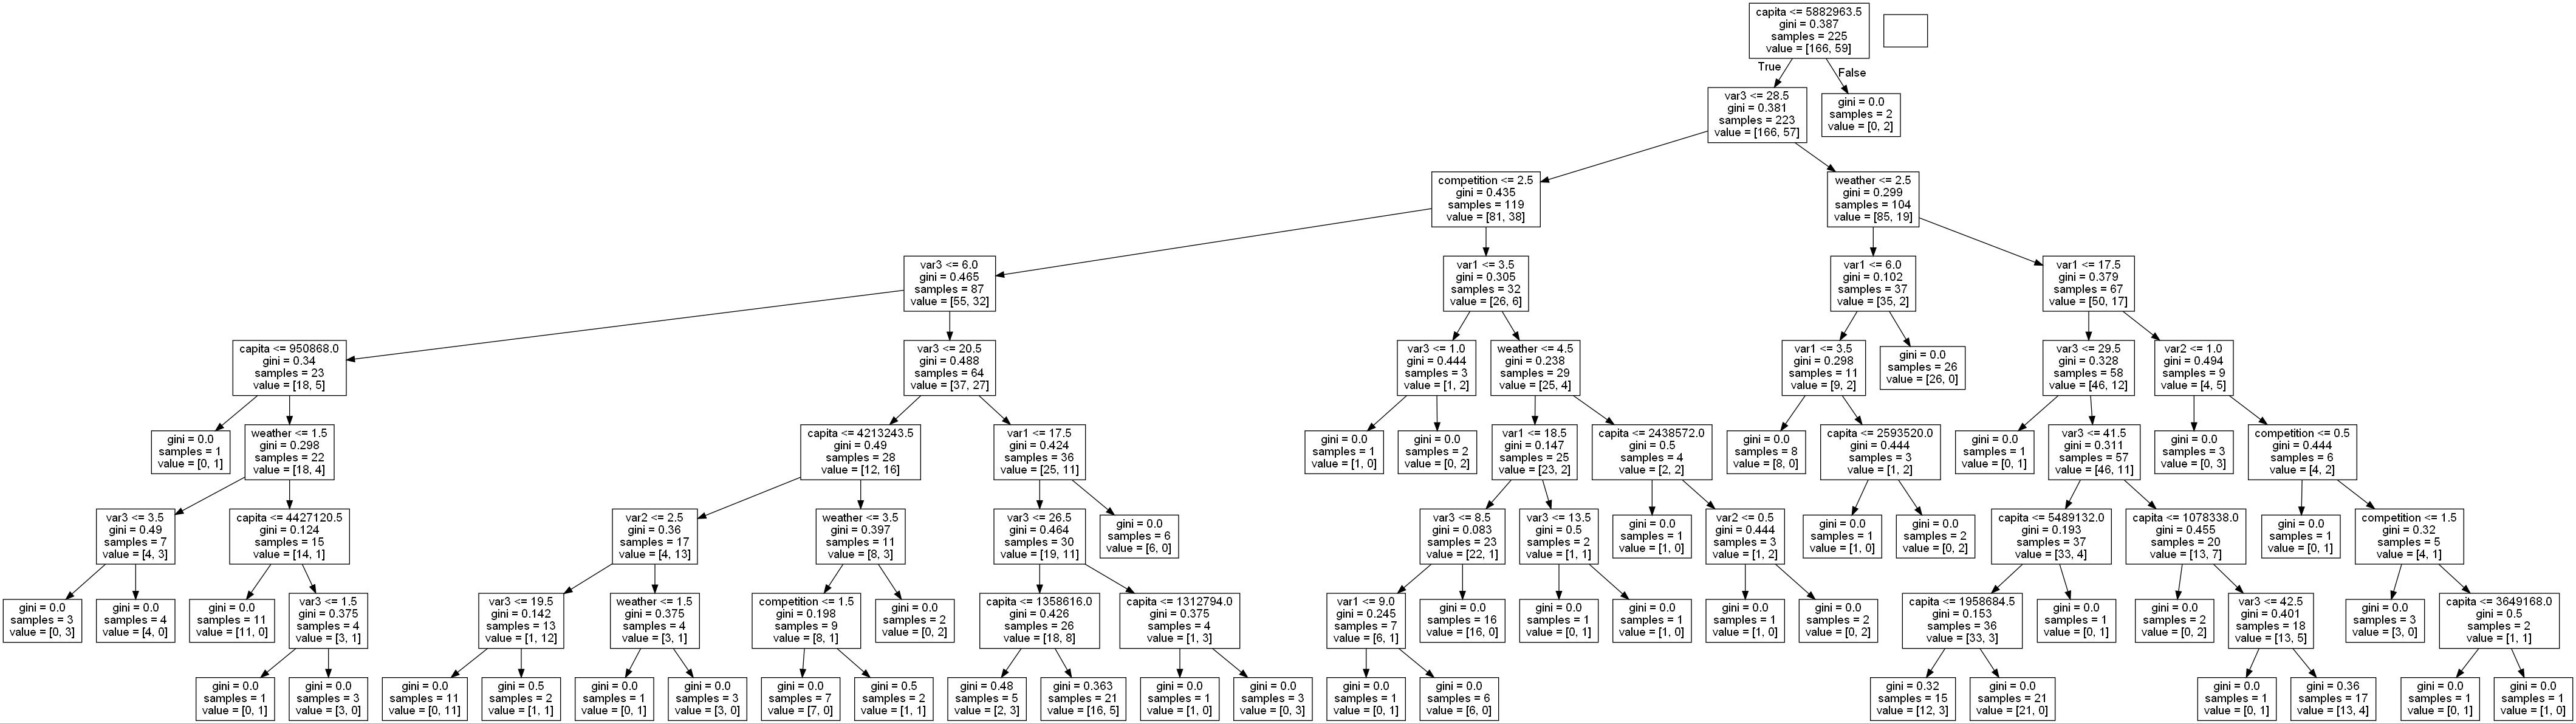

In [14]:
# Visualize the tree
export_graphviz(clf_tree, out_file="model_tree.odt", feature_names=train_X.columns)
model_tree_graph = pdot.graphviz.graph_from_dot_file('model_tree.odt')
model_tree_graph.write_jpg('model_tree.jpg')

from IPython.display import Image
Image(filename='model_tree.jpg')

This is really messy, let's reduce the max number to something lower. 

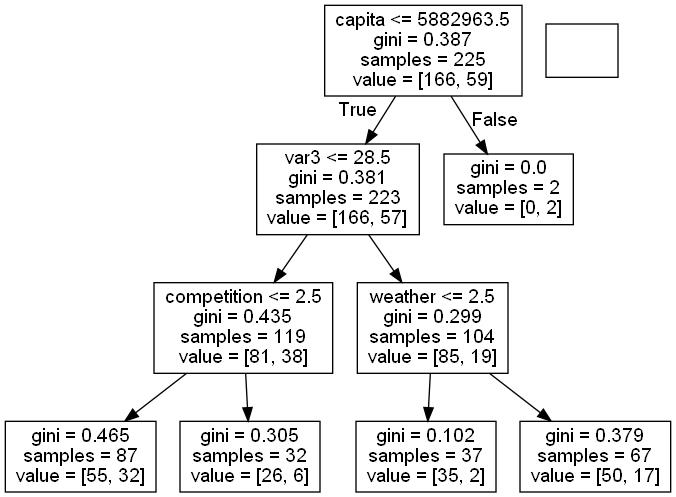

In [15]:
from IPython.display import Image
clf_tree = DecisionTreeClassifier(max_depth=3)
clf_tree.fit(train_X, train_y)
tree_predict = clf_tree.predict(test_X)

export_graphviz(clf_tree, out_file="model_tree.odt",
                feature_names=train_X.columns)
model_tree_graph = pdot.graphviz.graph_from_dot_file('model_tree.odt')
model_tree_graph.write_jpg('model_tree.jpg')

Image(filename='model_tree.jpg')
